In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from tensorflow.keras import layers, models

In [2]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Data preprocessing
X_valid, X_train = x_train[:5000] / 255.0, x_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

X_train = X_train.reshape(-1, 784)
X_test = x_test.reshape(-1, 784)
X_valid = X_valid.reshape(-1, 784)

In [3]:
# Create the model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2), 
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2), 
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/50
860/860 [==============================] - 1s 1ms/step - loss: 0.5923 - accuracy: 0.7882 - val_loss: 0.3844 - val_accuracy: 0.8636
Epoch 2/50
860/860 [==============================] - 1s 1ms/step - loss: 0.4251 - accuracy: 0.8466 - val_loss: 0.3700 - val_accuracy: 0.8674
Epoch 3/50
860/860 [==============================] - 1s 1ms/step - loss: 0.3838 - accuracy: 0.8594 - val_loss: 0.3446 - val_accuracy: 0.8774
Epoch 4/50
860/860 [==============================] - 1s 1ms/step - loss: 0.3660 - accuracy: 0.8662 - val_loss: 0.3367 - val_accuracy: 0.8734
Epoch 5/50
860/860 [==============================] - 1s 999us/step - loss: 0.3495 - accuracy: 0.8720 - val_loss: 0.3206 - val_accuracy: 0.8868
Epoch 6/50
860/860 [==============================] - 1s 1ms/step - loss: 0.3327 - accuracy: 0.8758 - val_loss: 0.3315 - val_accuracy: 0.8826
Epoch 7/50
860/860 [==============================] - 1s 1ms/step - loss: 0.3236 - accuracy: 0.8802 - val_loss: 0.3179 - val_accuracy: 0.8868
Epoc

In [6]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")


313/313 [==============================] - 0s 423us/step - loss: 58.0962 - accuracy: 0.8664
Test loss: 58.096160888671875
Test accuracy: 0.8664000034332275


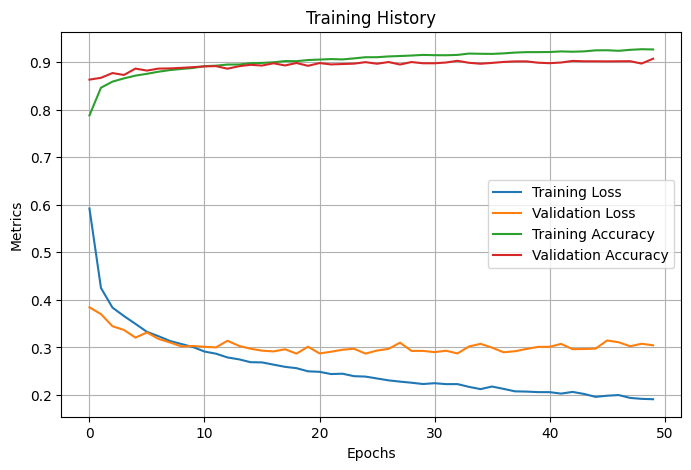

In [7]:
# Plot training history
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.title("Training History")
plt.legend()
plt.show()

313/313 [==============================] - 0s 425us/step


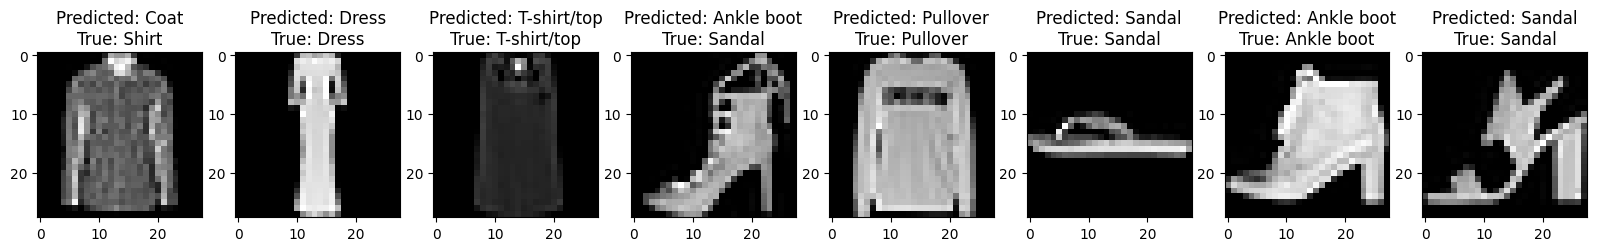

In [8]:
# Define class labels for Fashion MNIST
fashion_mnist_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Reshape X_test to match the expected input shape
X_test = X_test.reshape(10000, 784)

# Make predictions
predictions = model.predict(X_test)

# Visualize random predictions
num_samples = 8
random_indices = np.random.choice(len(X_test), num_samples, replace=False)

# Display images and predictions
plt.figure(figsize=(20, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')  
    predicted_label = fashion_mnist_labels[np.argmax(predictions[idx])]
    true_label = fashion_mnist_labels[y_test[idx]]
    plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')

plt.show()

У цьому завданні було запропоновано створити нейронну мережу для класифікації товарів із датасету Fashion MNIST. Завдання передбачало експерименти з різними архітектурами мережі та гіперпараметрами для досягнення точності, яка не нижче 91%.

Після навчання ваша модель досягла точності приблизно 92.7% на навчальному наборі та приблизно 90.7% на валідаційному наборі. Точність на тестовому наборі становила приблизно 86.6%.

На основі цих результатів можна зробити наступні висновки:

1. Модель була успішно навчена та мала хорошу точність на навчальному та валідаційному наборах, що свідчить про її здатність вивчати та узагальнювати зображення з датасету.

2. Можливо, ще є простір для вдосконалення моделі, можливі шляхи покращення включають в себе зміну архітектури мережі, оптимізацію гіперпараметрів, а також експерименти з різними методами регуляризації.

3. Наявність деякого рівня перенавчання може бути помітним на тестовому наборі, тому подальша оптимізація може бути корисною для підвищення точності моделі на нових даних.